In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.metrics import accuracy_score, roc_auc_score

In [102]:
data = pd.read_csv('clean_data.csv')
data

,score,gender,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,32,F,56,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,17,M,30,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,M,32,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,31,M,29,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,35,M,23,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,35,M,27,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5406,31,F,24,1.0,0.0,0.0,1.0,1.0,1.0,NaN,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
5407,4,M,22,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5408,41,M,16,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


# EDA

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   5410 non-null   int64  
 1   gender  5410 non-null   object 
 2   age     5410 non-null   int64  
 3   Q1      5379 non-null   float64
 4   Q2      5368 non-null   float64
 5   Q3      5378 non-null   float64
 6   Q4      5378 non-null   float64
 7   Q5      5376 non-null   float64
 8   Q6      5365 non-null   float64
 9   Q7      5366 non-null   float64
 10  Q8      5354 non-null   float64
 11  Q9      5362 non-null   float64
 12  Q10     5367 non-null   float64
 13  Q11     5369 non-null   float64
 14  Q12     5357 non-null   float64
 15  Q13     5359 non-null   float64
 16  Q14     5351 non-null   float64
 17  Q15     5341 non-null   float64
 18  Q16     5349 non-null   float64
 19  Q17     5358 non-null   float64
 20  Q18     5365 non-null   float64
 21  Q19     5372 non-null   float64
 22  

In [104]:
data.describe()

,score,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
count,5410.000000,5410.000000,5379.000000,5368.000000,5378.000000,5378.000000,5376.000000,5365.000000,5366.000000,5354.000000,...,5346.000000,5352.000000,5345.000000,5334.000000,5347.000000,5343.000000,5348.000000,5345.000000,5356.000000,5366.000000
mean,32.316451,30.416081,0.351366,0.385991,0.314615,0.518966,0.668899,0.785089,0.751025,0.393538,...,0.687991,0.857997,0.796819,0.588489,0.665233,0.709901,0.710172,0.749298,0.625653,0.142564
std,9.471427,18.206527,0.477442,0.486874,0.464406,0.499687,0.470653,0.410799,0.432460,0.488580,...,0.463357,0.349086,0.402403,0.492154,0.471953,0.453850,0.453725,0.433458,0.483999,0.349661
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,39.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,50.000000,900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
data = data[data['age']<=80]

In [106]:
data['score'] = data['score'].apply(lambda x: 'Normal' if 0<=x<=5 else 'Mild' if 6<=x<=20 else 'Moderate' if 21<=x<=35 else 'Severe')

<ipython-input-106-721b5afb0d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'] = data['score'].apply(lambda x: 'Normal' if 0<=x<=5 else 'Mild' if 6<=x<=20 else 'Moderate' if 21<=x<=35 else 'Severe')


In [107]:
data['score'].unique()

array(['Moderate', 'Mild', 'Severe', 'Normal'], dtype=object)

C:\Users\arund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


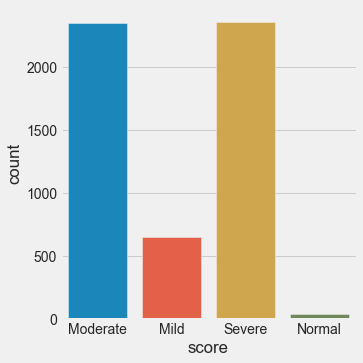

In [108]:
sns.catplot('score', data=data, kind='count')

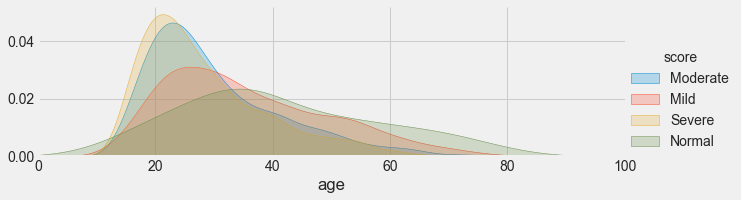

In [109]:
fig = sns.FacetGrid(data, hue="score", aspect=3)
fig.map(sns.kdeplot, 'age', shade=True)
fig.set(xlim=(0,100))
fig.add_legend()

In [110]:
data['age'] = data['age'].apply(lambda x: 'Student' if 14<=x<=25 else 'Working Class' if 26<=x<=45 else 'Middle Age' 
                                    if 46<=x<=60 else 'Senior Citizen')

<ipython-input-110-851b3aec77a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].apply(lambda x: 'Student' if 14<=x<=25 else 'Working Class' if 26<=x<=45 else 'Middle Age'


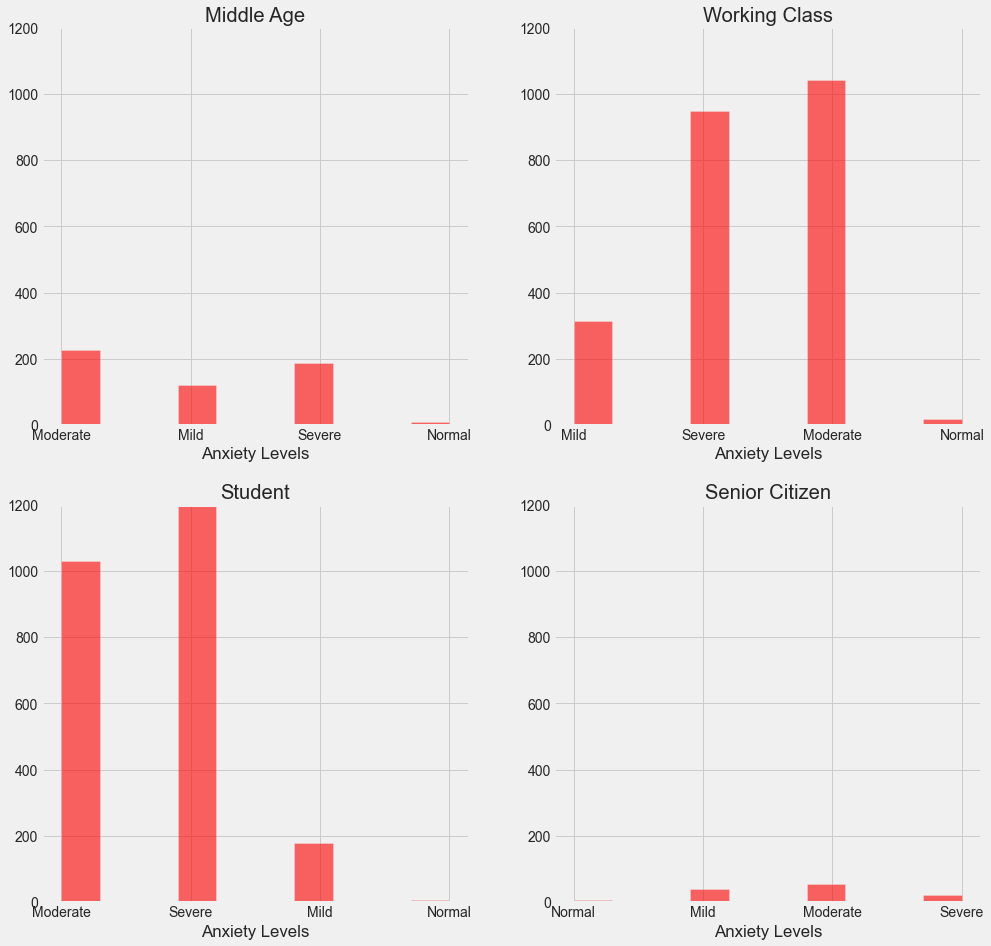

In [111]:
plt.figure(figsize=(15,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.ylim([0,1200])
    a = data['age'].unique()[i]
    plt.title(a)
    data[data["age"] == a]['score'].hist(bins=10, color='red', label=a, alpha=0.6)
    plt.xlabel('Anxiety Levels')

Text(0.5, 0, 'Anxiety Levels')

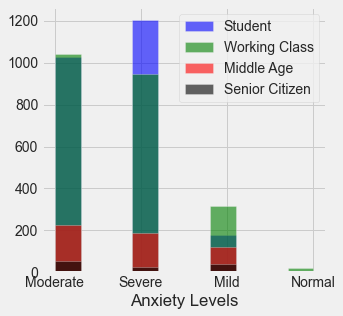

In [112]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data[data["age"] == 'Student']['score'].hist(bins=10, color='blue', label='Student', alpha=0.6)
data[data["age"] == 'Working Class']['score'].hist(bins=10, color='green', label='Working Class', alpha=0.6)
data[data["age"] == 'Middle Age']['score'].hist(bins=10, color='red', label='Middle Age', alpha=0.6)
data[data["age"] == 'Senior Citizen']['score'].hist(bins=10, color='black', label='Senior Citizen', alpha=0.6)
plt.legend()
plt.xlabel('Anxiety Levels')

# PIPELINE

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [114]:
Y = data['score']
X = data.drop(['score'], axis = 1)

In [115]:
ordinal_encoder = OrdinalEncoder()
X['age'] = ordinal_encoder.fit_transform(X[['age']])

In [116]:
ordinal_encoder = OrdinalEncoder()
X['gender'] = ordinal_encoder.fit_transform(X[['gender']])

In [117]:
num_transform = Pipeline([('imputer', SimpleImputer(strategy="median"))])
num_cols = [cname for cname in X.columns if X[cname].dtype in ['float64', 'int64']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transform, num_cols)
    ])
X_prep = preprocessor.fit_transform(X)

In [118]:
data_X = pd.DataFrame(X_prep, columns = [data.columns.drop(['score'])])
data_X.head()

,gender,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,1.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [119]:
for cname in data_X.columns:
    if data_X[cname].dtype == 'float64':
        data_X[cname] = data_X[cname].astype('int64')

# PCA

In [120]:
from sklearn.decomposition import PCA

In [121]:
def evaluate(components, eigenValues, eigenVectors, df):
    weightage = {}
    
    col = ['PC'+ str(i+1) for i in range(components.shape[1])]
    transform = pd.DataFrame(components, columns = col)
    display(transform)
    
    var = eigenValues/sum(eigenValues)
    for i in range(1,len(var)+1):
        if sum(var[:i])>=0.9:
            no_of_pc = i
            break
    print(f'\n{no_of_pc} components explains 90% or more variability')
    
    for i in range(no_of_pc):
        top_n = np.argsort( abs(eigenVectors[i]) )[::-1][:4] # shows top 4 affecting features
        weightage['PC'+str(i+1)] = [df.columns[j] for j in top_n]
    
    impact = pd.DataFrame.from_dict(weightage, orient='index')
    impact['Variability (%)'] = var[:no_of_pc]
    impact['Cummulative Variability (%)'] = [sum(var[:i]) for i in range(1,no_of_pc+1)]
    display(impact)
    return transform, impact, no_of_pc

In [122]:
def PCA_lib(df):
    pca = PCA(df.shape[1])
    pca.fit(df)
    eigenVectors = pca.components_.T
    eigenValues = pca.explained_variance_
    components = pca.transform(df)
    return components, eigenValues, eigenVectors

In [123]:
components, eigenValues, eigenVectors = PCA_lib(data_X)

In [124]:
transform, impact, no_of_pc = evaluate(components, eigenValues, eigenVectors, data_X)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52
0,0.244122,2.248848,-0.301563,0.262330,-0.658805,-0.919316,-0.322931,-0.910110,-0.332012,-0.190853,...,-0.091576,0.022440,0.405239,-0.129605,-0.307534,-0.122593,-0.058689,-0.064796,0.101595,0.080224
1,2.376635,-0.952435,0.138638,-0.091227,0.467497,-0.237366,-0.757659,0.375592,-0.147235,-0.468797,...,0.482031,-0.352790,0.151579,0.219107,0.407243,0.437648,-0.142320,-0.570691,-0.159095,0.806056
2,-1.345368,-0.708224,0.409412,0.018707,0.318115,0.680849,-0.174609,0.093350,0.320018,0.092069,...,-0.091000,0.014441,-0.119238,-0.258339,-0.053479,0.108293,-0.227872,-0.430085,-0.103163,-0.023931
3,0.076401,-0.706398,-1.304835,-0.612571,0.905016,-0.436311,0.351246,0.366972,0.213778,0.217881,...,0.224436,-0.408372,0.456298,0.859648,-0.033191,-0.114633,-0.350727,0.127991,0.084378,-0.192097
4,-0.361269,0.263160,0.103308,-0.437038,1.176969,0.447754,1.053741,0.238339,-0.093338,-0.284703,...,-0.339394,-0.022364,-0.137884,-0.251701,-0.102841,0.113655,-0.327684,-0.410427,-0.016806,0.001390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5401,-0.297581,-0.786286,-1.069106,-0.049352,-0.270365,-0.285704,-0.065230,-0.330315,1.069813,0.334831,...,-0.114356,-0.079052,0.115981,0.061206,-0.002333,0.045502,-0.100159,-0.030731,0.151939,0.020743
5402,0.054585,0.205599,-0.729003,-0.221752,-0.158687,-0.009827,0.061803,-0.997098,-0.564814,-0.793309,...,-0.022847,0.104871,-0.068057,0.204701,-0.190507,0.099490,0.110925,-0.070774,-0.027942,0.092900
5403,4.134527,-0.065343,0.332728,0.513014,0.722494,-0.140816,-0.003954,-0.192783,0.171498,1.045784,...,-0.069070,0.306310,-0.008861,0.173170,0.027725,-0.059199,0.157622,0.092543,0.205944,0.131299
5404,-1.045459,0.240213,-0.258124,0.266602,0.372673,-0.237251,-0.004933,1.308768,0.280619,0.491386,...,0.071417,0.055736,-0.142600,0.044850,0.053358,-0.068623,-0.009132,-0.045895,-0.040184,0.050891



39 components explains 90% or more variability


,0,1,2,3,Variability (%),Cummulative Variability (%)
PC1,"(Q3,)","(Q23,)","(Q17,)","(Q19,)",0.165630,0.165630
PC2,"(age,)","(gender,)","(Q2,)","(Q10,)",0.072006,0.237636
PC3,"(Q24,)","(Q16,)","(Q9,)","(Q14,)",0.037644,0.275279
PC4,"(Q30,)","(Q19,)","(Q17,)","(Q1,)",0.036971,0.312251
PC5,"(Q11,)","(Q24,)","(Q9,)","(Q22,)",0.033951,0.346202
PC6,"(Q17,)","(Q16,)","(Q18,)","(Q9,)",0.026227,0.372429
PC7,"(Q15,)","(Q22,)","(Q17,)","(Q5,)",0.024793,0.397222
PC8,"(Q43,)","(Q7,)","(Q44,)","(Q18,)",0.023565,0.420787
PC9,"(Q26,)","(Q34,)","(Q24,)","(Q30,)",0.022817,0.443604
PC10,"(Q18,)","(Q14,)","(Q17,)","(Q15,)",0.021623,0.465227


# TRAIN-TEST SPLIT

In [125]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [126]:
X = transform.iloc[:,list(range(0,no_of_pc))]

In [127]:
Y = np.array(Y).reshape(-1,1)
Y = ordinal_encoder.fit_transform(Y)
Y = np.squeeze(Y)

In [128]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4324, 39) (1082, 39) (4324,) (1082,)


# CLASSIFIERS

## Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB

#### GridSearch CV

In [130]:
naive = GaussianNB()
naive.fit(X_train, Y_train)

GaussianNB()

In [131]:
pred_naive = naive.predict(X_test)

#### K-fold Cross Validation

In [132]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
naive_auc = cross_val_score(naive, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
naive_accuracy = cross_val_score(naive, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [133]:
pd.DataFrame([[accuracy_score(Y_test, pred_naive), '-'],[np.mean(naive_accuracy), np.mean(naive_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.931608,-
K-fold,0.911187,0.977426


Text(0, 0.5, 'AUC')

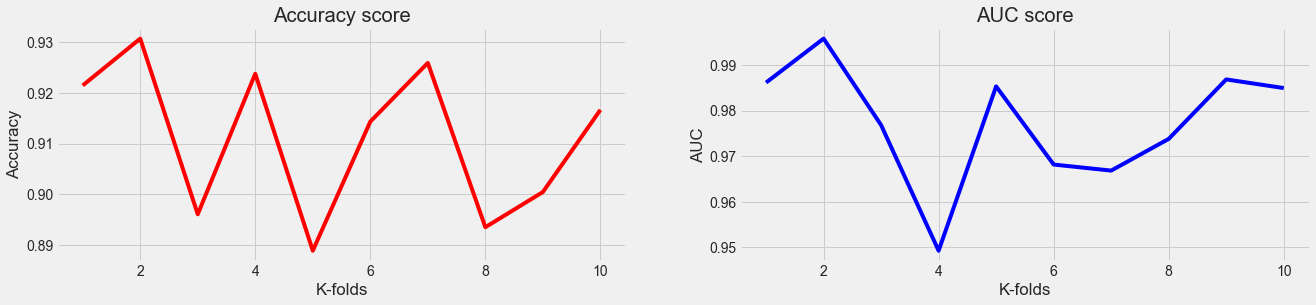

In [134]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,naive_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')


ax1.plot(degree,naive_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

## KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier

#### GridSearch CV

In [136]:
tuned_parameters_knn = {'n_neighbors' : [i for i in range(3,13,2)]}

In [137]:
knn_model = KNeighborsClassifier()
knn = GridSearchCV(knn_model, tuned_parameters_knn, cv=10, scoring='accuracy')
knn.fit(X_train, Y_train)
knn.best_score_

0.8302508339748526

In [138]:
knn.best_params_

{'n_neighbors': 11}

In [139]:
pred_knn = knn.predict(X_test)

#### K-fold Cross Validation

In [140]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
knn_auc = cross_val_score(knn, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
knn_accuracy = cross_val_score(knn, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [141]:
pd.DataFrame([[accuracy_score(Y_test, pred_knn),  '-'],[np.mean(knn_accuracy), np.mean(knn_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.828096,-
K-fold,0.823313,0.974699


Text(0, 0.5, 'AUC')

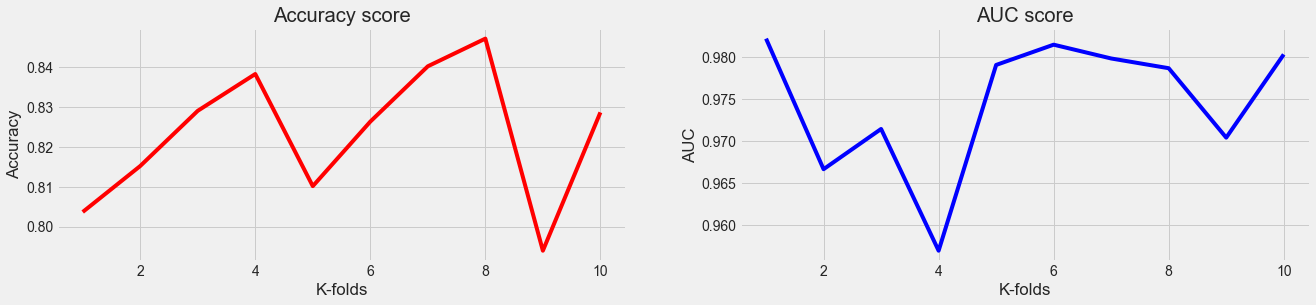

In [142]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,knn_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')

ax1.plot(degree,knn_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

## Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

#### GridSearch CV

In [144]:
tuned_parameters_log = {'penalty' : ['l2', 'none'], 'C' : [i for i in range(1,80,10)], 'class_weight' : [None,'balanced'], 
                        'max_iter' : [i for i in range(400,1000,100)]}

In [145]:
'''logistic = LogisticRegression(solver = 'lbfgs', random_state = 0)
log_reg = GridSearchCV(logistic, tuned_parameters_log, cv=10, scoring='accuracy')
log_reg.fit(X_train, Y_train)
log_reg.best_score_'''

"logistic = LogisticRegression(solver = 'lbfgs', random_state = 0)\nlog_reg = GridSearchCV(logistic, tuned_parameters_log, cv=10, scoring='accuracy')\nlog_reg.fit(X_train, Y_train)\nlog_reg.best_score_"

In [146]:
#log_reg.best_params_

In [147]:
log_reg = LogisticRegression(solver = 'lbfgs', random_state = 0, C= 1, class_weight= None, max_iter = 400, penalty = 'l2')
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1, max_iter=400, random_state=0)

In [148]:
pred_log = log_reg.predict(X_test)

#### K-fold Cross Validation

In [149]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
log_auc = cross_val_score(log_reg, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
log_accuracy = cross_val_score(log_reg, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [150]:
pd.DataFrame([[accuracy_score(Y_test, pred_log),  '-'],[np.mean(log_accuracy), np.mean(log_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.963031,-
K-fold,0.955127,0.978635


Text(0, 0.5, 'AUC')

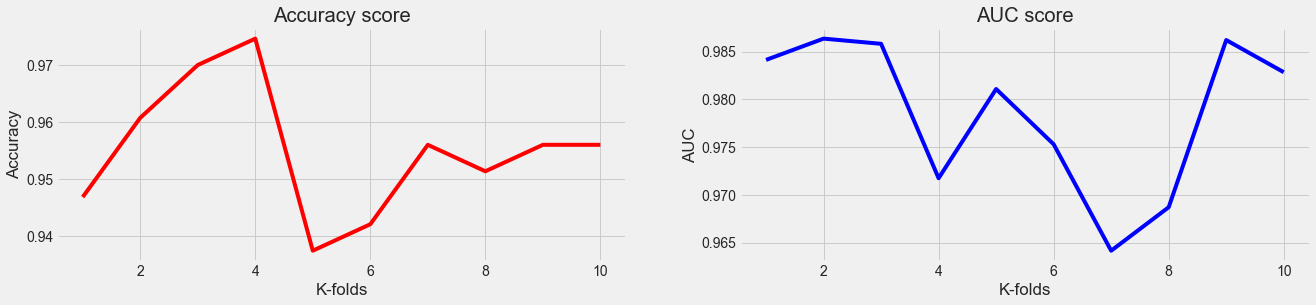

In [151]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,log_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')

ax1.plot(degree,log_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

## SVM

In [152]:
from sklearn.svm import SVC

#### GridSearch CV

In [153]:
tuned_parameters_svm = {'C': (np.arange(4,6,0.2)) , 'kernel': ['linear', 'rbf', 'poly'],
                    'gamma': [0.01,0.1,1,10], 'degree': [2,3,4]}

In [154]:
'''svm_model= SVC(random_state = 0)
svm = GridSearchCV(svm_model, tuned_parameters_svm,cv=10,scoring='accuracy')
svm.fit(X_train, Y_train)
svm.best_score_'''

"svm_model= SVC(random_state = 0)\nsvm = GridSearchCV(svm_model, tuned_parameters_svm,cv=10,scoring='accuracy')\nsvm.fit(X_train, Y_train)\nsvm.best_score_"

In [155]:
#svm.best_params_

In [156]:
svm = SVC(probability=True, random_state = 0, C = 5, degree = 2, gamma = 0.01, kernel = 'linear')
svm.fit(X_train, Y_train)

SVC(C=5, degree=2, gamma=0.01, kernel='linear', probability=True,
    random_state=0)

In [157]:
pred_svm = svm.predict(X_test)

#### K-fold Cross Validation

In [158]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
svm_auc = cross_val_score(svm, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
svm_accuracy = cross_val_score(svm, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [159]:
pd.DataFrame([[accuracy_score(Y_test, pred_svm), '-'],[np.mean(svm_accuracy),np.mean(svm_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.975046,-
K-fold,0.964150,0.981163


Text(0, 0.5, 'AUC')

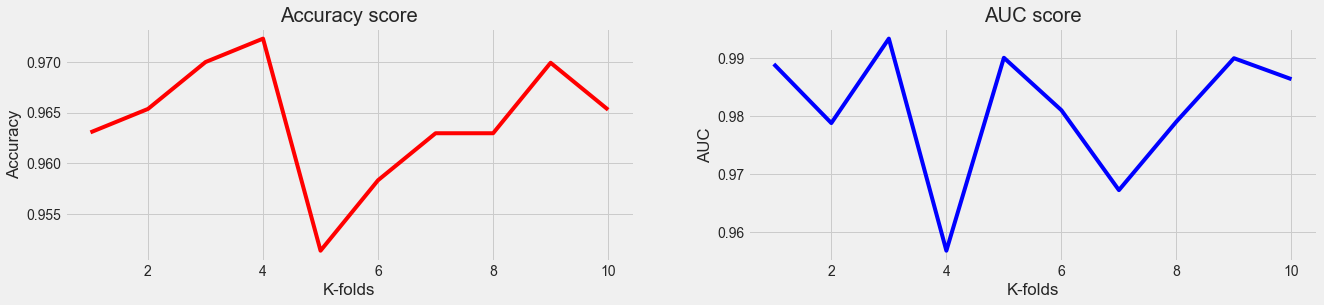

In [160]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,svm_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')

ax1.plot(degree,svm_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

## Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

#### GridSearch CV

In [162]:
tuned_parameters_dtc = {'criterion' : ['gini', 'entropy'], 'max_depth' : list(range(3,7)), 'min_samples_split' : list(range(3,7)), 
                    'min_samples_leaf' : list(range(3,7)), 'max_leaf_nodes' : list(range(3,12))}

In [163]:
'''dec_tree= DecisionTreeClassifier(random_state = 0)
dtc = GridSearchCV(dec_tree, tuned_parameters_dtc, cv=10, scoring='accuracy')
dtc.fit(X_train, Y_train)
dtc.best_score_'''

"dec_tree= DecisionTreeClassifier(random_state = 0)\ndtc = GridSearchCV(dec_tree, tuned_parameters_dtc, cv=10, scoring='accuracy')\ndtc.fit(X_train, Y_train)\ndtc.best_score_"

In [164]:
#dtc.best_params_

In [165]:
dtc = DecisionTreeClassifier(random_state = 0, criterion = 'gini', max_depth = 3, max_leaf_nodes = 4, min_samples_leaf = 3, min_samples_split = 3)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=3,
                       min_samples_split=3, random_state=0)

In [166]:
pred_dtc = dtc.predict(X_test)

#### K-fold Cross Validation

In [167]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
dtc_auc = cross_val_score(dtc, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
dtc_accuracy = cross_val_score(dtc, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [168]:
pd.DataFrame([[accuracy_score(Y_test, pred_dtc), '-'],[np.mean(dtc_accuracy), np.mean(dtc_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.959335,-
K-fold,0.940789,0.963203


Text(0, 0.5, 'AUC')

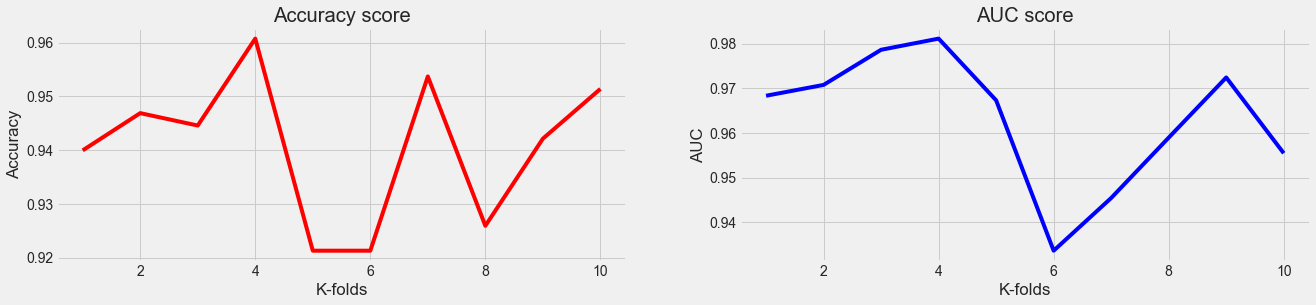

In [169]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,dtc_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')

ax1.plot(degree,dtc_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

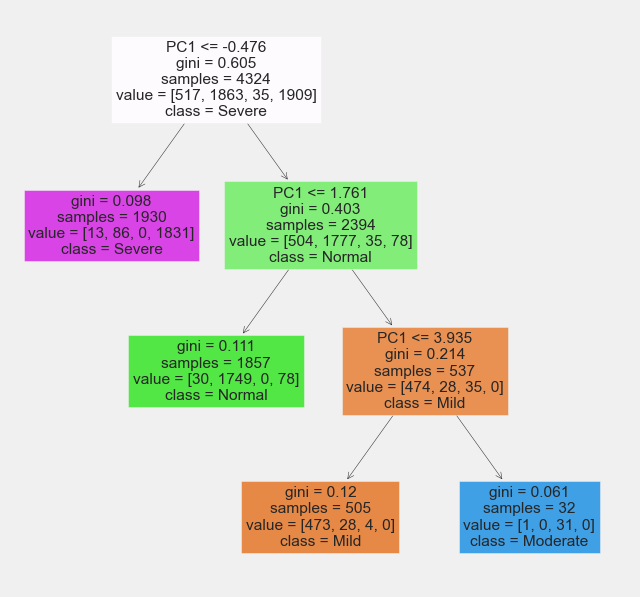

In [170]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtc,
               feature_names=X.columns,
               class_names= list(set(data['score'])),
               filled = True)
plt.show()

## Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

#### GridSearch CV

In [172]:
tuned_parameters_rfc = {'n_estimators' : [i for i in range(100,160,10)], 'criterion' : ['gini', 'entropy'], 
                        'max_depth' : list(range(15,40,5)), 'min_samples_split' : list(range(2,5)), 
                        'min_samples_leaf' : list(range(1,5)), 'max_leaf_nodes' : list(range(10,210,50)),'max_features' : ['auto', 'log2', None]}

In [173]:
'''random_forest = RandomForestClassifier(random_state = 0)
rfc = GridSearchCV(random_forest, tuned_parameters_rfc, cv=10, scoring='accuracy')
rfc.fit(X_train, Y_train)
rfc.best_score_'''

"random_forest = RandomForestClassifier(random_state = 0)\nrfc = GridSearchCV(random_forest, tuned_parameters_rfc, cv=10, scoring='accuracy')\nrfc.fit(X_train, Y_train)\nrfc.best_score_"

In [174]:
#rfc.best_params_

In [175]:
rfc = RandomForestClassifier(random_state = 0, n_estimators = 150)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=150, random_state=0)

In [176]:
pred_rfc = rfc.predict(X_test)

#### K-fold Cross Validation

In [177]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
# evaluate model
rfc_auc = cross_val_score(rfc, X_train, Y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1)
rfc_accuracy = cross_val_score(rfc, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [178]:
pd.DataFrame([[accuracy_score(Y_test, pred_rfc), '-'],[np.mean(rfc_accuracy), np.mean(rfc_auc)]], columns = ['Accuracy', 'AUC'], index = ['Prediction', 'K-fold'])

,Accuracy,AUC
Prediction,0.961183,-
K-fold,0.939168,0.972616


Text(0, 0.5, 'AUC')

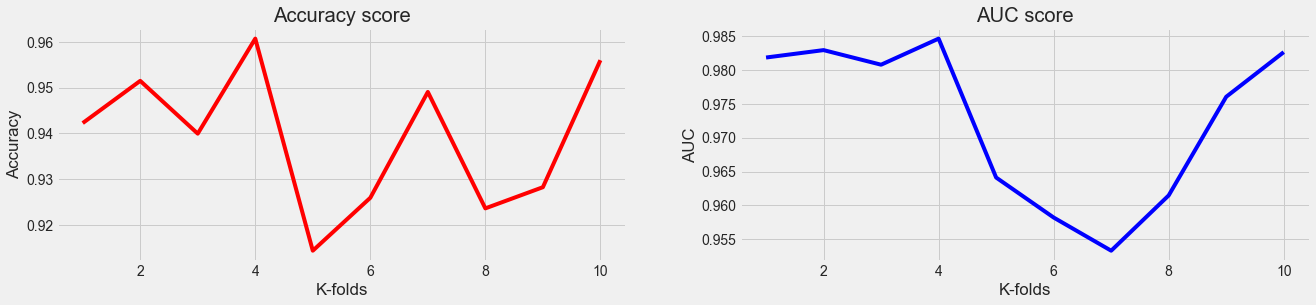

In [179]:
degree = [i for i in range(1,11)]

f, (ax0, ax1)= plt.subplots(1, 2, figsize=(20,4))
ax0.plot(degree,rfc_accuracy,color='r')
ax0.set_title('Accuracy score')
ax0.set_xlabel('K-folds')
ax0.set_ylabel('Accuracy')

ax1.plot(degree,rfc_auc,color='b')
ax1.set_title('AUC score')
ax1.set_xlabel('K-folds')
ax1.set_ylabel('AUC')

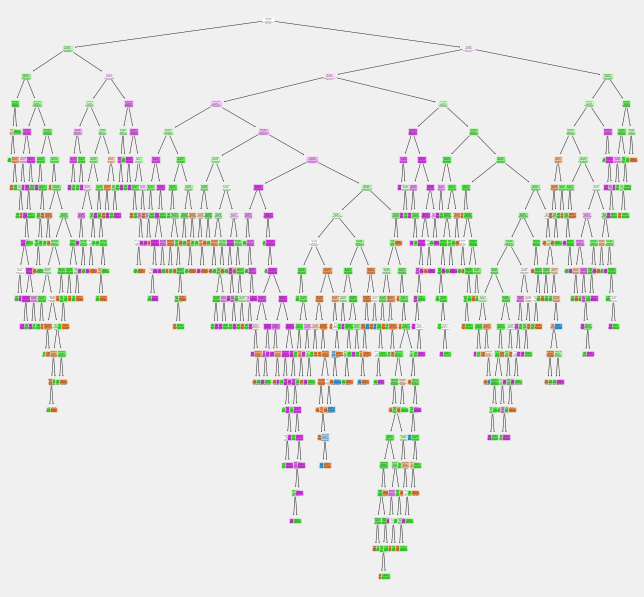

In [180]:
plt.figure(figsize=(10,10))
tree.plot_tree(rfc.estimators_[1],
               feature_names=X.columns,
               class_names= list(set(data['score'])),
               filled = True)
plt.show()

# METRICS

In [181]:
from sklearn.metrics import confusion_matrix,classification_report

In [182]:
model_pred = {'Naive Bayes' : pred_naive, 'KNN' : pred_knn, 'Logistic Regression' : pred_log, 'SVM' : pred_svm, 'Decision Tree Classifier' : pred_dtc, 'Random Forest Classifier' : pred_rfc}

#### Confusion Matrix

In [183]:
for v,k in model_pred.items():
    print(f'{v} :\n{confusion_matrix(Y_test, model_pred[v])}\n\n\n')

Naive Bayes :
[[117  10   4   4]
 [  8 464   0  16]
 [  1   0   5   0]
 [  0  31   0 422]]



KNN :
[[116   3  14   2]
 [ 15 325   0 148]
 [  0   0   6   0]
 [  2   2   0 449]]



Logistic Regression :
[[126   5   0   4]
 [  8 469   0  11]
 [  2   0   4   0]
 [  0  10   0 443]]



SVM :
[[127   3   1   4]
 [  8 471   0   9]
 [  2   0   4   0]
 [  0   0   0 453]]



Decision Tree Classifier :
[[123   7   1   4]
 [  5 469   0  14]
 [  1   0   5   0]
 [  0  12   0 441]]



Random Forest Classifier :
[[122  11   0   2]
 [  2 475   0  11]
 [  4   0   2   0]
 [  0  12   0 441]]





#### Classification Report

In [184]:
for v,k in model_pred.items():
    print(f'{v} :\n{classification_report(Y_test, model_pred[v])}\n\n\n')

Naive Bayes :
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       135
         1.0       0.92      0.95      0.93       488
         2.0       0.56      0.83      0.67         6
         3.0       0.95      0.93      0.94       453

    accuracy                           0.93      1082
   macro avg       0.84      0.90      0.86      1082
weighted avg       0.93      0.93      0.93      1082




KNN :
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       135
         1.0       0.98      0.67      0.79       488
         2.0       0.30      1.00      0.46         6
         3.0       0.75      0.99      0.85       453

    accuracy                           0.83      1082
   macro avg       0.73      0.88      0.74      1082
weighted avg       0.87      0.83      0.83      1082




Logistic Regression :
              precision    recall  f1-score   support

         0.0       0.93    

In [185]:
accuracy = [[accuracy_score(Y_test, pred_naive), np.mean(naive_accuracy), np.mean(naive_auc)], 
            [accuracy_score(Y_test, pred_knn), np.mean(knn_accuracy), np.mean(knn_auc)], 
            [accuracy_score(Y_test, pred_log), np.mean(log_accuracy), np.mean(log_auc)], 
            [accuracy_score(Y_test, pred_svm), np.mean(svm_accuracy), np.mean(svm_auc)], 
            [accuracy_score(Y_test, pred_dtc), np.mean(dtc_accuracy), np.mean(dtc_auc)], 
            [accuracy_score(Y_test, pred_rfc), np.mean(rfc_accuracy), np.mean(rfc_auc)]]

pd.DataFrame(accuracy, columns = ['Prediction Accuracy', 'K-Fold Accuracy', 'AUC score'], 
             index = ['Naive Bayes Classification', 'K-Nearest Neighbour', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier'])

,Prediction Accuracy,K-Fold Accuracy,AUC score
Naive Bayes Classification,0.931608,0.911187,0.977426
K-Nearest Neighbour,0.828096,0.823313,0.974699
Logistic Regression,0.963031,0.955127,0.978635
Support Vector Machine,0.975046,0.964150,0.981163
Decision Tree Classifier,0.959335,0.940789,0.963203
Random Forest Classifier,0.961183,0.939168,0.972616


# BOOSTING

## AdaBoost

In [186]:
from sklearn.ensemble import AdaBoostClassifier

In [187]:
def adaboostclassifier(est, X_train, Y_train, X_test, Y_test):
    ada = AdaBoostClassifier(base_estimator = est, n_estimators=50, learning_rate=1)
    adaboost = ada.fit(X_train, Y_train)
    Y_pred_ada = adaboost.predict(X_test)
    return accuracy_score(Y_test, Y_pred_ada)

## Gradient Boost

In [188]:
from sklearn.ensemble import GradientBoostingClassifier 

In [189]:
def gradboostclassifier(est, X_train, Y_train, X_test, Y_test):
    grb = GradientBoostingClassifier(init = est, n_estimators=50, learning_rate=1)
    gradboost = grb.fit(X_train, Y_train)
    Y_pred_grb = gradboost.predict(X_test)
    return accuracy_score(Y_test, Y_pred_grb)

# Comaparison

In [190]:
base_est = {'Logistic' : log_reg, 'SVM' : svm, 'Decision Tree' : dtc, 'Random Forest' : rfc}

In [191]:
boost_acc = []
for v,k in base_est.items():
    ada = adaboostclassifier(base_est[v], X_train, Y_train, X_test, Y_test)
    grad = gradboostclassifier(base_est[v], X_train, Y_train, X_test, Y_test)
    acc = [ada, grad]
    boost_acc.append(acc)

In [192]:
pd.DataFrame(boost_acc, columns = ['AdaBoost', 'Gradient Boosting'], index = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier'])

,AdaBoost,Gradient Boosting
Logistic Regression,0.826248,0.955638
Support Vector Machine,0.728281,0.894640
Decision Tree Classifier,0.923290,0.890943
Random Forest Classifier,0.958410,0.967652


# Voting Classifier

In [193]:
from sklearn.ensemble import VotingClassifier

In [194]:
estimators = []
estimators.append(('Logistic', log_reg))
estimators.append(('SVM', svm))
estimators.append(('Decision Tree', dtc))
estimators.append(('Random Forest', rfc))

In [195]:
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=1, max_iter=400,
                                                 random_state=0)),
                             ('SVM',
                              SVC(C=5, degree=2, gamma=0.01, kernel='linear',
                                  probability=True, random_state=0)),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     max_leaf_nodes=4,
                                                     min_samples_leaf=3,
                                                     min_samples_split=3,
                                                     random_state=0)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=150,
                                                     random_state=0))])

In [196]:
Y_pred_vote = voting.predict(X_test)
print(f'Accuracy with Voting Classifier: {accuracy_score(Y_test, Y_pred_vote)}')

Accuracy with Voting Classifier: 0.9695009242144177


In [197]:
vote = {
    'Train':{},
    'Test':{accuracy_score(Y_test, voting.predict(X_test))}
}

In [198]:
scores = {
    'Train' : {'Naive Bayes':accuracy_score(Y_train, naive.predict(X_train)),
               'KNN': accuracy_score(Y_train, knn.predict(X_train)),
               'Logistic':accuracy_score(Y_train, log_reg.predict(X_train)),
               'SVM':accuracy_score(Y_train, svm.predict(X_train)),
               'Decision Tree':accuracy_score(Y_train, dtc.predict(X_train)),
               'Random Forest':accuracy_score(Y_train, rfc.predict(X_train)),
               'Voting Classifier':accuracy_score(Y_train, voting.predict(X_train))
              },
    'Test' : {'Naive Bayes':accuracy_score(Y_test, pred_naive),
               'KNN': accuracy_score(Y_test, pred_knn),
               'Logistic':accuracy_score(Y_test, pred_log),
               'SVM':accuracy_score(Y_test, pred_svm),
               'Decision Tree':accuracy_score(Y_test, pred_dtc),
               'Random Forest':accuracy_score(Y_test, pred_rfc),
              'Voting Classifier':accuracy_score(Y_test, voting.predict(X_test))
             }
}

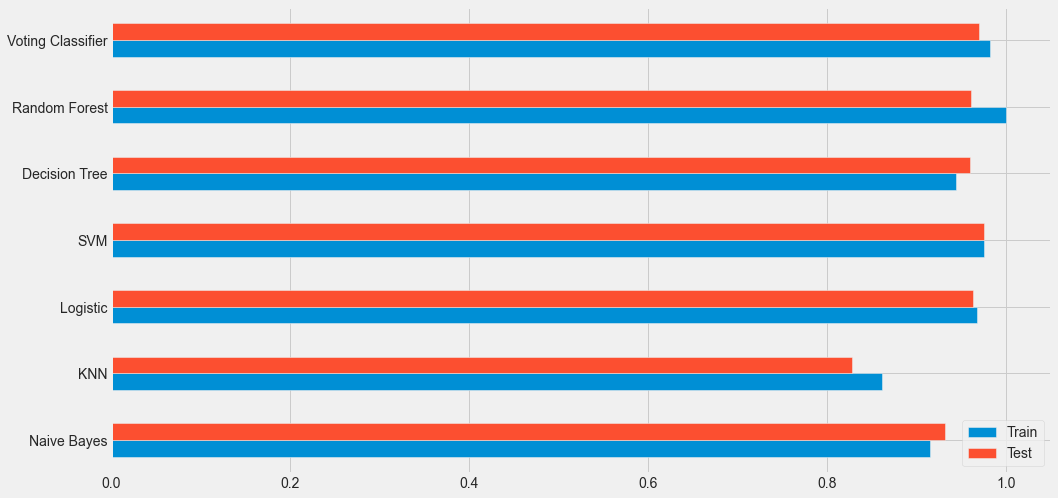

In [199]:
scores_data = pd.DataFrame(scores)

scores_data.plot(kind='barh', figsize=(15,8))

plt.legend(loc = 'lower right')